In [80]:
from google.colab import files

# Step 1: Load the data
import pandas as pd
df = pd.read_csv("UTS_PalestineDataset.csv")

df.head()

# Step 2: Explore the data
df.info()

# Step 3: Data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = df['full_text'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 3
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df['cluster'] = model.labels_

df.head()

# output the result to a text file.

clusters = df.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['username','full_text','created_at','tweet_url']] #
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_text            2475 non-null   object
 1   created_at           2475 non-null   object
 2   id_str               2475 non-null   int64 
 3   quote_count          2475 non-null   int64 
 4   reply_count          2475 non-null   int64 
 5   retweet_count        2475 non-null   int64 
 6   favorite_count       2475 non-null   int64 
 7   lang                 2475 non-null   object
 8   user_id_str          2475 non-null   int64 
 9   conversation_id_str  2475 non-null   int64 
 10  username             2475 non-null   object
 11  tweet_url            2475 non-null   object
dtypes: int64(7), object(5)
memory usage: 232.2+ KB


In [81]:
print("\nSummary")
df['cluster'].describe()


Summary


count    2475.000000
mean        0.670303
std         0.909166
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         2.000000
Name: cluster, dtype: float64

In [82]:
print("\nJumlah data permasing masing cluster : ")
df['cluster'].value_counts()


Jumlah data permasing masing cluster : 


0    1565
2     749
1     161
Name: cluster, dtype: int64

In [83]:
print("\nPersebaran 20 data pertama : ")
df['cluster'].head(20)


Persebaran 20 data pertama : 


0     2
1     1
2     0
3     0
4     2
5     0
6     0
7     2
8     0
9     1
10    0
11    0
12    0
13    2
14    2
15    0
16    0
17    0
18    0
19    0
Name: cluster, dtype: int32

In [84]:
print("Contoh data permasing masing cluster")
for i in range(k):
  sub_cluster = df[df['cluster'] == i]
  print("\n\nCluster", i,":\n",sub_cluster['full_text'].head())

Contoh data permasing masing cluster


Cluster 0 :
 2    Now I know why hitla cleaned y’all out free Pa...
3    @Adii__here @goddeketal Their going to flatten...
5    @RepDonaldsPress You’re deep state. don’t pret...
6               @jacksonhinklle Palestine should burn!
8    @MrAndyNgo Maybe we ship them all off to Pales...
Name: full_text, dtype: object


Cluster 1 :
 1                                @Forbes Free palestine
9     From the river to the sea. Palestine will be f...
29      @fakhrifadzli Palestine will be free !!! 🇵🇸🇵🇸🇵🇸
51                       @LauraLoomer FREE PALESTINE 🇵🇸
86             @MyLordBebo Free Palestine.... Free Gaza
Name: full_text, dtype: object


Cluster 2 :
 0     I can't see a war between two countries. Israe...
4     @DrLoupis You seemed fine when it was just pal...
7     How it feels retweeting your nugu fav's comeba...
13    I'm still waiting for the DA leader. John Stee...
14    @jjhawktree @Rfc1872I @Sirloum @SkyNews You gu...
Name: full_text, dtyp

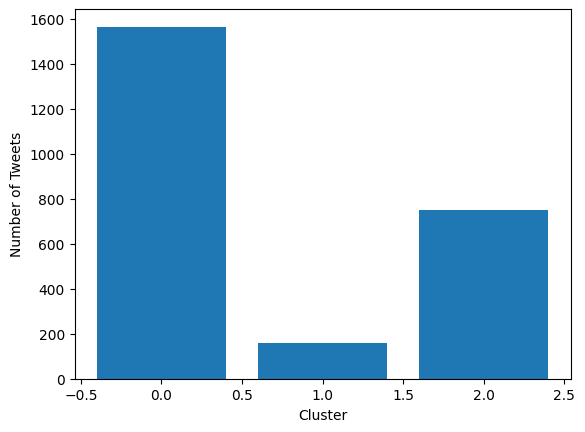

In [85]:
cluster_sizes = df['cluster'].value_counts()
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Tweets')
plt.show()